A2 Python Analysis Project

Migi Czean Carino

Understanding the relationship between weather conditions, day of the week, seasonality and bike rental patterns are essential for both transportation planners and bike-sharing services. Among various weather variables, it can significantly influence the decision-making of bike users or cyclists. As outdoor activities like biking are physically demanding, unfavorable weather can deter people from renting bikes. High humidity levels, especially when combined with elevated temperatures, can make cycling uncomfortable by increasing the body's thermal strain (Tuned Into Cycling, 2012). Dew point temperature, a direct measure of atmospheric moisture, provides a clearer indication of how humid it feels compared to relative humidity. According to Alex Tran, dew points below 60F (15C) are generally considered comfortable, while anything above can feel oppressive and discourage physical activities (Alex Tran, 2024). In contrast, moderate temperatures and lower dew point levels encourage more people to rent bikes, as the conditions feel more pleasant and energizing. Therefore, analyzing how these weather variables interact offers valuable insights into fluctuations in bike rental volumes.

In [3]:
# This is to check if the excel file is working

# Importing packages
import pandas as pd
import warnings 
warnings.simplefilter(action='ignore')

# Storing the path to the dataset
file = "bikes.xlsx"

# Reading the file into Python through pandas
bikes = pd.read_excel(io = file)

# Checking results
bikes

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1383,Dec,Sunday,15,3.1,25,3.9,2000,-15.0,0.90,0.0,0.0,Winter,Yes,330
1383,1384,Dec,Sunday,19,0.0,31,2.2,2000,-15.1,0.00,0.0,0.0,Winter,Yes,173
1384,1385,Dec,Sunday,20,-1.0,32,0.9,2000,-15.6,0.00,0.0,0.0,Winter,Yes,174
1385,1386,Dec,Sunday,21,-1.6,35,1.0,2000,-15.1,0.00,0.0,0.0,Winter,Yes,190


In [5]:
# Converting data types with a dictionary
data_types = {"Month"       : str,
              "Day of Week" : str,
              "Season"      : str,
              "Holiday"     : str}


# Instantiating the dataset as an object
bikes = pd.read_excel(io            = file,       
                         sheet_name = 'bikes', 
                         header     = 0      ,          
                         dtype      = data_types,   # applying new data types
                         usecols    = range(1, 15) ) # not importing id


# Checking results
bikes.head(n = 10)

,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225
5,Jan,Monday,10,-1.4,50,1.9,1355,-10.5,0.38,0.0,0.0,Winter,No,221
6,Jan,Monday,18,-0.8,24,2.3,2000,-18.9,0.01,0.0,0.0,Winter,No,723
7,Jan,Tuesday,21,-4.3,47,2.8,1997,-13.9,0.00,0.0,0.0,Winter,No,352
8,Jan,Wednesday,3,-7.4,54,1.7,1968,-15.1,0.00,0.0,0.0,Winter,No,63
9,Jan,Wednesday,7,-8.1,51,0.5,1987,-16.4,0.00,0.0,0.0,Winter,No,324


In [39]:
# This part is intended to see/check the values of the given dataset (VALUE CHECKER)

# Data to be subset
data = bikes [ ['Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'UV Index', 'Rainfall', 'Snowfall', 'RENTALS'] ]

# Conditions
#temp_condition   = (bikes.loc[ : , 'Temperature']  < )
#humi_condition   = (bikes.loc[ : , 'Humidity']  > )
#wind_condition   = (bikes.loc[ : , 'Wind Speed']  > )
#visi_condition   = (bikes.loc[ : , 'Visibility']  > )
#dew_condition    = (bikes.loc[ : , 'Dew Point Temperature']  > )
#uv_condition     = (bikes.loc[ : , 'UV Index']  > )
#rain_condition   = (bikes.loc[ : , 'Rainfall']  > )
#snow_condition   = (bikes.loc[ : , 'Snowfall']  > )
rentals_condition = (bikes.loc[ : , 'RENTALS']  > 3500)

data[rentals_condition]

,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
604,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,3640
657,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,3734


In [16]:
# This is to generate a set of descriptive statistics to better understand the data

bikes.describe(include = 'number').round(decimals = 2)

,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00
mean,11.55,13.09,58.76,1.71,1434.42,4.37,0.57,0.14,0.08,810.02
std,6.92,11.90,20.56,1.02,618.09,13.10,0.87,1.26,0.44,694.72
min,0.00,-15.80,11.00,0.00,81.00,-30.50,0.00,0.00,0.00,5.00
25%,6.00,3.20,43.00,0.90,946.00,-4.40,0.00,0.00,0.00,250.50
50%,12.00,14.10,58.00,1.50,1718.00,5.20,0.01,0.00,0.00,626.00
75%,18.00,22.80,75.00,2.30,2000.00,15.60,0.98,0.00,0.00,1196.50
max,23.00,38.00,98.00,7.40,2000.00,26.60,3.45,35.00,7.00,3734.00


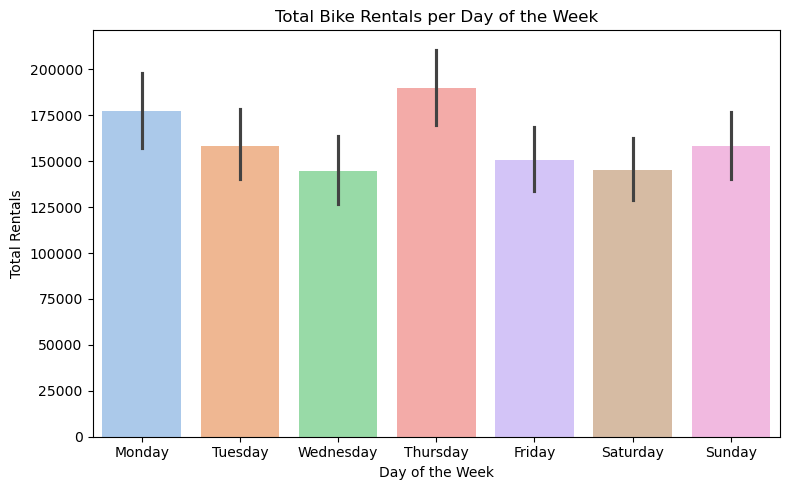

In [6]:
# VISUALIZATION 1 - TOTAL BIKE RENTALS PER DAY OF THE WEEK

# Importing packages
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

# Defining the correct order of the days
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Treating the 'Day of Week' as a categorical variable
bikes['Day of Week'] = pd.Categorical(bikes['Day of Week'], categories = week_order, ordered = True)

# Creating a bar plot (bar graph)
plt.figure(figsize = (8, 5))
sns.barplot(data = bikes, 
               x = 'Day of Week',
               y = 'RENTALS',
       estimator = np.sum,  # It sums all the values of the y-variable for each x-variable
         palette ='pastel') # Color of the bar plot

# Bar plot labels
plt.title('Total Bike Rentals per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()


The analysis of total bike rentals per day of the week shows that Thursday has the highest number of rentals, exceeding 180,000, followed closely by Monday with over 175,000. Interestingly, Wednesday and Saturday have the lowest rental counts, each with just over 140,000, indicating a mid-week and weekend dip in usage. This pattern suggests that bike rentals are more popular on weekdays, possibly due to commuting patterns, as people are more likely to rent bikes for work or school. The lower numbers on Wednesday may reflect a mid-week slump, while Saturday's dip could be due to leisure users preferring other weekend activities or unfavorable weekend weather. To boost rentals on low-performing days, the company could offer mid-week and weekend promotions or discounts, or partner with local events or businesses to create incentives for bike use. Additionally, improving route accessibility and visibility near weekend hotspots like parks or markets may encourage more recreational use on Saturdays.

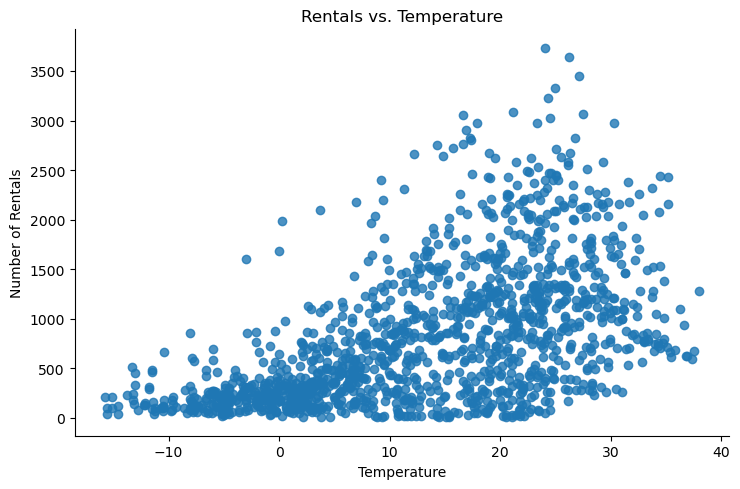

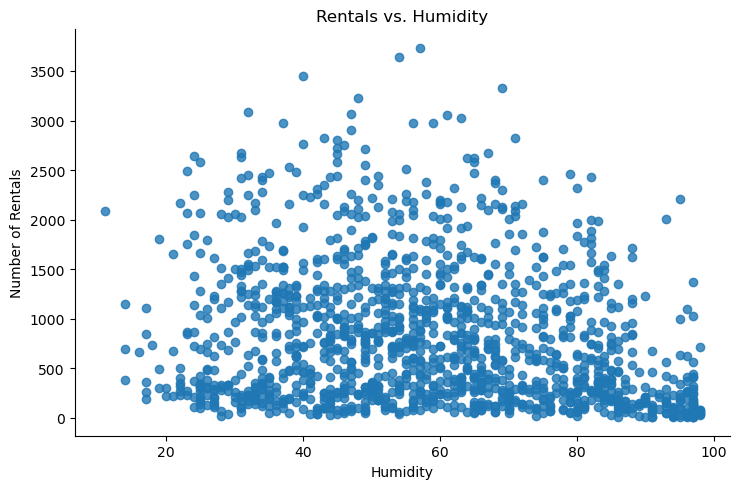

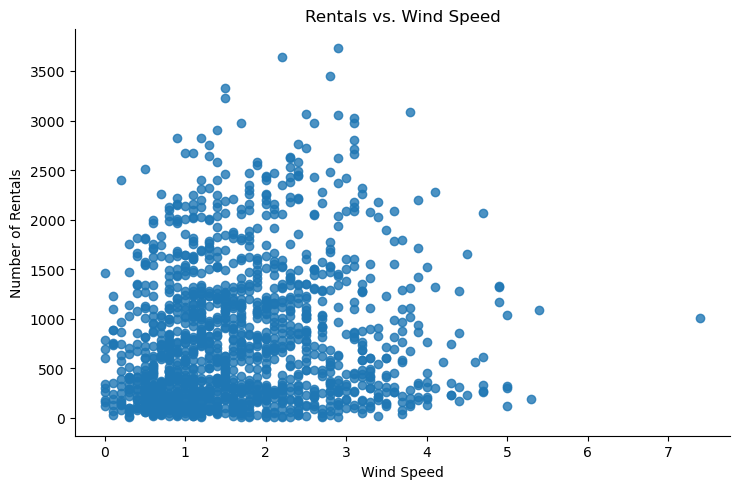

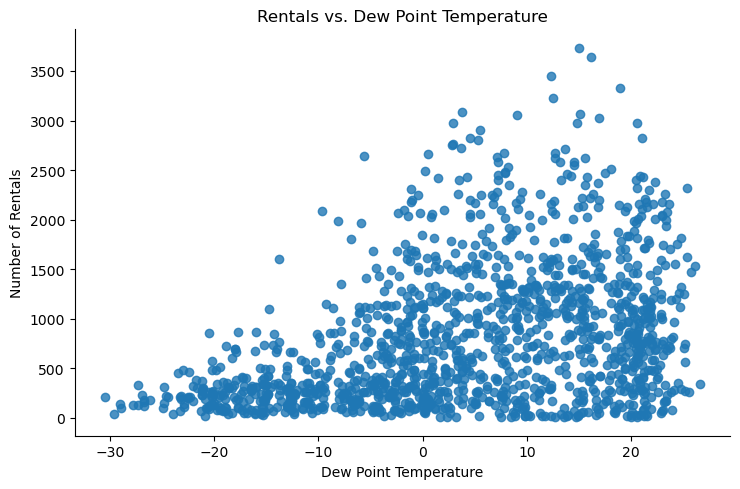

In [29]:
# VISUALIZATION 2 - WEATHER CONDITIONS VS. NUMBER OF RENTALS

# Defining a list of the weather condtions to be analyzed with the number of bike rentals
weather_factors = ['Temperature', 'Humidity', 'Wind Speed', 'Dew Point Temperature']

# Looping through each weather conditions to generate a scatter plot for each of those conditions
for factor in weather_factors:
    sns.lmplot (data     = bikes, 
                 x       = factor,
                 y       = 'RENTALS',
                 hue     = None, # categorical data for subsets
                 scatter = True, # renders a scatter plot
                 fit_reg = False, # renders a regression line
                 aspect  = 1.5) # aspect ratio for plot
    
# Scatter plot labels
    plt.title (f'Rentals vs. {factor}')
    plt.xlabel(factor)
    plt.ylabel('Number of Rentals')
    plt.tight_layout()
    plt.show

The data shows that bike rental numbers are strongly influenced by weather conditions, with noticeable trends across temperature, humidity, wind speed, and dew point. The highest rentals, 3,734 and 3,640, occurred at temperatures of 24.1C and 26.2C, indicating that mild to warm temperatures are ideal for biking. In contrast, very low rentals of 5 and 9 were recorded at colder temperatures of 3.8C, 4.6C and 14.5C, suggesting that colder weather discourages biking activity. Similarly, humidity levels around 54-57% were associated with maximum rentals, while higher humidity levels of 90-94% corresponded with the lowest. This supports the idea that moderate humidity feels more comfortable, allowing for longer and more enjoyable rides. Wind speeds were also moderate (2.2 to 2.9) on the highest rental days, showing that calm conditions are favorable, while lower wind values (1.7-2.7) on low rental days may have coincided with other uncomfortable weather elements. Dew point values of 15C and 16.1C were observed during high rentals days, which fall within the "comfortable" range of dew points (10C-16C) according to Alex Tran (2024). On the other hand, low rentals occurred when dew points dropped to 3.2C, 2.3C and 13.5C, suggesting that too-dry or unstable air can also reduce the appeal of biking. Based on this analysis, ideal weather conditions for high bike rental demand include temperatures between 24C and 27C, humidity around 55%, light wind speeds under 3, and dew points between 14C and 16C.These conditions likely create an environment where people feel physically comfortable and safe to ride, boosting the overall demand for bike rentals.

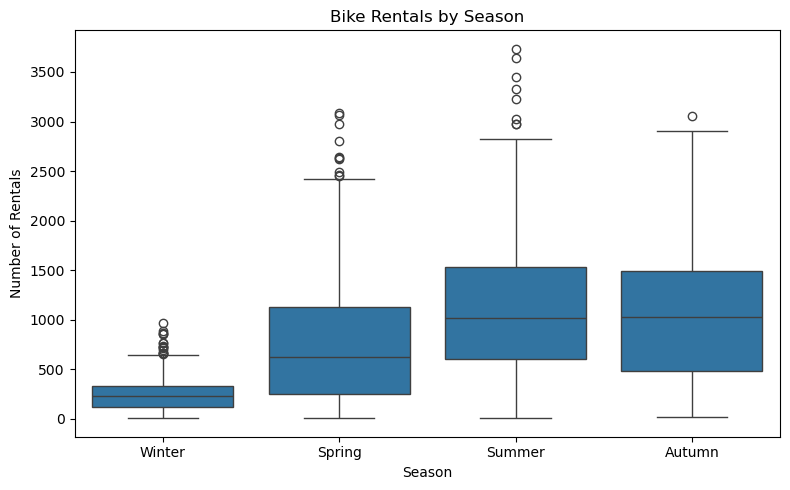

In [40]:
# VISUALIZATION 3 - BIKE RENTALS BY SEASON 

# Creating a boxplot showing the distribution of bike rentals across different seasons
plt.figure(figsize = (8, 5))
sns.boxplot(data = bikes, 
               x = 'Season', 
               y = 'RENTALS')

# Boxplot labels
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.tight_layout()
plt.show()

The analysis of bike rentals by season reveals that summer has the highest total number of rentals, which aligns with expectations due to warm and dry weather. Spring rank second, indicating a strong start to biking activity as temperatures rise. Interestingly, summer and autumn have the same average (mean) number of rentals, both higher than those in spring and winter, suggesting consistent biking activity across these seasons. Winter shows the lowest rental numbers, likely due to cold temperatures, shorter daylight hours, and increased chances of rain or snow. These findings show that seasonality has a significant impact on bike rental demand, with people more likely to ride in warmer and more stable weather conditions. Based on these insights, the company should maximize marketing efforts and bike availability during summer and autumn to meet high demand. During the low-demand winter season, they could offer promotional discounts, invest in weather-protected routes, or partner with indoor cycling events to maintain engagement and encourage rentals despite unfavorable weather.

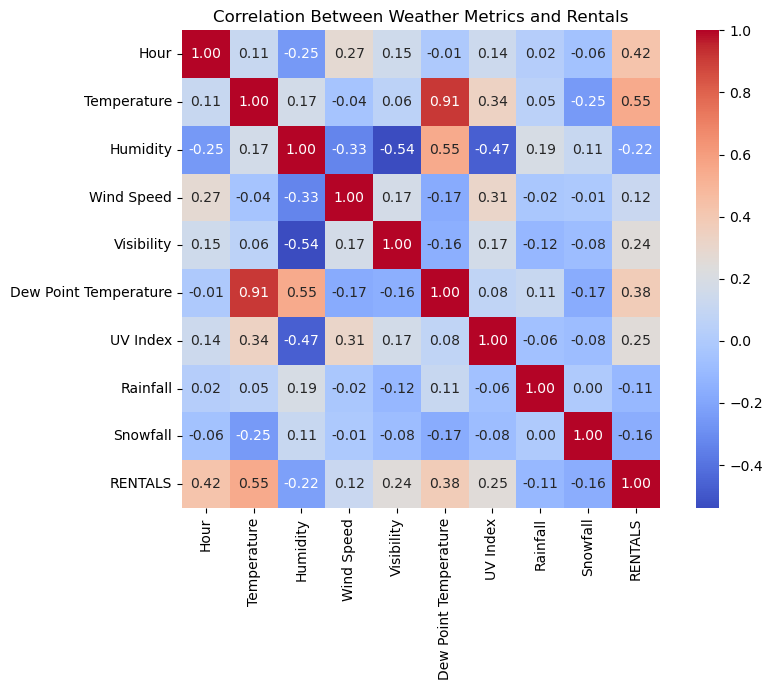

In [7]:
# VISUALIZATION 4 

# Excluding the first column in the data set using iloc
bikes_corr = bikes.iloc[ : , 1:].corr(numeric_only = True)

# Creating a heatmap of the correlation matrix
plt.figure(figsize = (9, 7))
sns.heatmap(bikes_corr, annot = True, 
                         cmap = 'coolwarm', # Color of the heatmap
                          fmt = ".2f",      # It controls the format of the value in each cell of the heatmap
                       square = True)       # Making each cell of heatmap a perfect square rather than rectangle

# Heatmap label
plt.title('Correlation Between Weather Metrics and Rentals')
plt.tight_layout()
plt.show()

The heatmap illustrates the correlation between various weather metrics and the number of bike rentals, with values ranging from -1 to 1. Among all the weather factors, temperature has the strongest correlation with rentals (0.55), suggesting that as the temperature increases, more people are likely to rent bikes. Dew point temperature also shows a moderate correlation (0.38), indicating that comfortable moisture levels in the air play a role in encouraging outdoor biking. Conversely, humidity (-0.22) and snowfall (-0.16) are weakly correlated with rentals, meaning that the higher humidity or snowfall reduces the number of rentals. Other weather conditions like wind speed (0.12), UV index (0.25), and visibility (0.24) have weaker correlations, but still contribute to the rental decision to some extent. Hour of the day also has a moderate correlation (0.42), showing that the time of the day influences biking activity which is likely due to peak commuting or leisure hours. Overall, this analysis highlights that warmer, drier, and more visible weather conditions correlate with increased bike rentals, and suggests that the company can use weather forecasts to optimize bike availability and targeted promotions.

Note: All the answers in the analysis questions are in the interpretation under all the visualization to make it not redundant.

Top Three Insights

Insight 1: Temperature is the Strongest Predictor of Bike Rentals

Among all weather related factors, temperature shows the highest correlation (0.55) with bike rentals, as shown in the correlation heatmap. The data confirms this further that the highest rental counts (3,734 and 3640) were observed at temperatures of 24.1C and 26.2C, which fall within the ideal range for outdoor physical activity. Warmer temperatures create a more inviting environment for both casual and commuter riders, leading to increased rental volume. This supports the idea that bike rental services should anticipate higher demand during warmer months or days. Overall, temperature serves as a key metric for knowing the rental patterns and optimizing operational decisions such as promotional timing.

Insight 2: Summer and Autumn are High-Opportunity Seasons for Bike Rentals

The seasonal analysis shows that summer has the highest total number of rentals, with spring trailing closely behind, while winter consistently shows the lowest demand. Interestingly, summer and autumn have the same average (mean) number of rentals, meaning both seasons offer equally strong potential for business but spring has an upper edge. This implies that good weather condition extend into autumn, making it a viable peak season. In contrast, winter likely suffers from low temperatures, rain, and shorter daylight hours. These trends indicate that seasonality has a clear and predictable effect on rental bike user behavior which companies can use to plan marketing campaigns.

Insight 3: Dew Point and Humidity Have a Clear Impact on Rental Bike User Comfort and Behavior

The dew point temperature has a moderate correlation (0.38) with bike rentals, and the highest rental days occurred when dew points were 15C and 16.1C which are range categorized as "comfortable according to Alex Tran (2024). On the other hand, high humidity values (91-94%) coincide with the lowest rental days, and humidity has a negative correlation (-0.22) with rentals. This suggests that rental bike user comfort plays a significant role in rental decisions. particularly when the air feel heavy. The data highlights that while temperature is important, perceived comfort from dew point and humidity levels can further influence bike rentals. Therefore, weather-related variables tied to comfort should be continuously monitored, as they can signal potential fluctuations in rental bike user demand.

References:

Murnane, K. (2012, July 15). Cycling in Heat and Humidity. Tuned in to Cycling. https://tunedintocycling.com/2012/07/15/cycling-in-heat-and-humidity/

Alex Tran. (2025). Why the Dew Point is Way Better Than Humidity for Runners. https://www.alextran.org/dew-point/